### Goal: Plot Arsenal's goal difference from data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C:/Users/Harry/Friends-Of-Tracking/data/Peter Mckeeven Lecture/pl_goal_summary_data.csv")
df.head()

,season_id,team,goals_for,goals_against,goal_diff,team_season
0,2010,Arsenal,72.0,43.0,29.0,Arsenal 2010/2011
1,2010,Aston Villa,48.0,59.0,-11.0,Aston Villa 2010/2011
2,2010,Birmingham,37.0,58.0,-21.0,Birmingham 2010/2011
3,2010,Blackburn,46.0,59.0,-13.0,Blackburn 2010/2011
4,2010,Blackpool,55.0,78.0,-23.0,Blackpool 2010/2011


In [15]:
# selectiing team
team = "Arsenal"

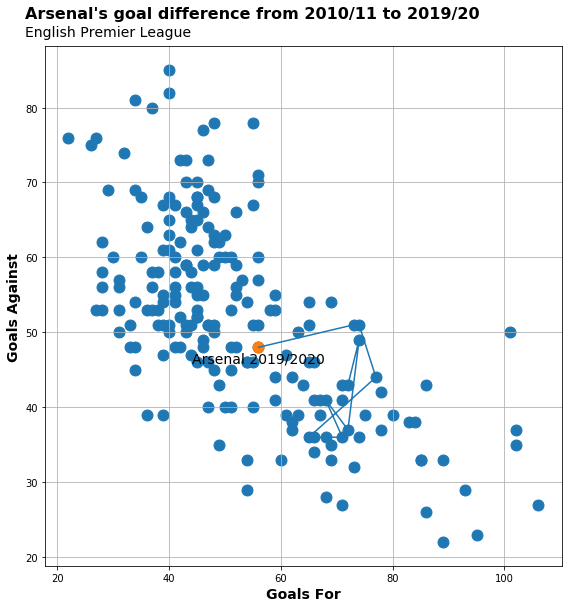

In [28]:
# creating figure and axes
fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor("w")

# adding a grid
ax.grid()

# getting our data to plot

x = df.goals_for.tolist()
y = df.goals_against.tolist()

ax.scatter(x,y,s=120)

# getting data for specified team
x = df[df.team == team].goals_for.tolist()
y = df[df.team == team].goals_against.tolist()
t = df[df.team == team].team_season.tolist()

# plotting a line to track team's change over seasons
ax.plot(x,y)

# plotting team's most recent season and label
ax.scatter(x[-1],y[-1],s=120)
t = ax.text(x[-1],y[-1]-2,t[-1],color='k',fontsize=14, ha="center")

# adding title and subtitle
fig.text(0.05,1,"{}'s goal difference from 2010/11 to 2019/20\n".format(team), fontsize=16, fontweight="bold")        
fig.text(0.05,1,"English Premier League",fontweight="regular", fontsize=14)

# adding x and y labels
ax.set_xlabel("Goals For", fontweight="bold", fontsize=14)
ax.set_ylabel("Goals Against", fontweight="bold", fontsize= 14)


plt.tight_layout()
plt.show()